# Illustrative Example of the cleaning of Itiner-E Roads Map 

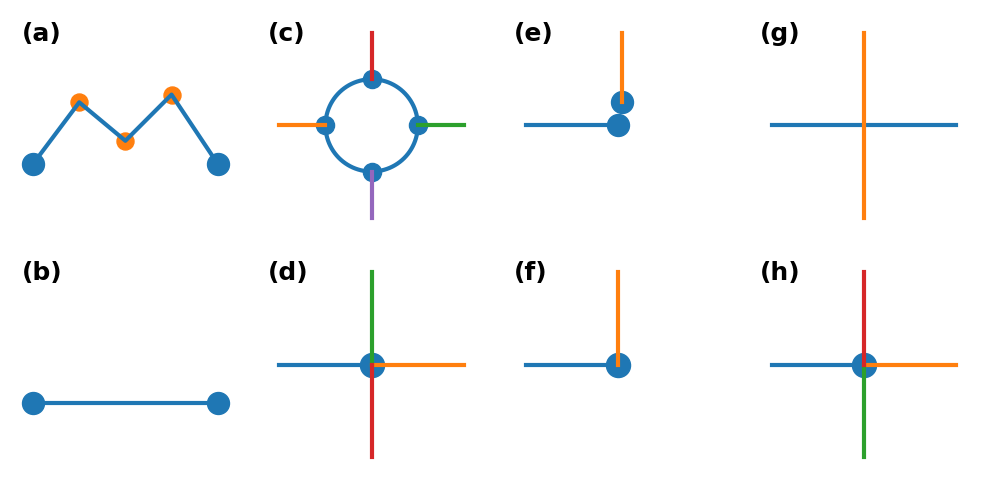

Saved: itinere_network_cleaning_schematics.png


In [101]:
import numpy as np
import matplotlib.pyplot as plt

def draw_degree2_before(ax):
    # chain with degree-2 nodes forming a path between two intersections
    # More visually interesting bent path
    ax.plot([-1.2, -0.6, 0.0, 0.6, 1.2], [-0.5, 0.3, -0.2, 0.4, -0.5], linewidth=3)
    ax.scatter([-1.2, 1.2], [-0.5, -0.5], s=250)  # important endpoint nodes
    ax.scatter([-0.6, 0.0, 0.6], [0.3, -0.2, 0.4], s=150)  # degree-2 nodes
    ax.text(0.05, 0.95, "(a)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_degree2_after(ax):
    # simplified: direct edge between endpoints, degree-2 nodes removed
    ax.plot([-1.2, 1.2], [-0.5, -0.5], linewidth=3)
    ax.scatter([-1.2, 1.2], [-0.5, -0.5], s=250)  # only endpoint nodes remain
    ax.text(0.05, 0.95, "(b)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_roundabout_before(ax):
    # roundabout as small ring with multiple connectors -> many nearby nodes
    # Shortened edges
    t = np.linspace(0, 2*np.pi, 200)
    ax.plot(0.6*np.cos(t), 0.6*np.sin(t), linewidth=3)  # smaller ring
    # shorter connectors
    ax.plot([-1.2, -0.6], [0, 0], linewidth=3)
    ax.plot([0.6, 1.2], [0, 0], linewidth=3)
    ax.plot([0, 0], [0.6, 1.2], linewidth=3)
    ax.plot([0, 0], [-0.6, -1.2], linewidth=3)
    # larger nodes on ring
    ax.scatter([0.6*np.cos(a) for a in [0, np.pi/2, np.pi, 3*np.pi/2]],
               [0.6*np.sin(a) for a in [0, np.pi/2, np.pi, 3*np.pi/2]], s=170)
    ax.text(0.05, 0.95, "(c)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_roundabout_after(ax):
    # roundabout collapsed to centroid node with connectors
    ax.plot([-1.2, 0], [0, 0], linewidth=3)
    ax.plot([0, 1.2], [0, 0], linewidth=3)
    ax.plot([0, 0], [0, 1.2], linewidth=3)
    ax.plot([0, 0], [0, -1.2], linewidth=3)
    ax.scatter([0], [0], s=300)
    ax.text(0.05, 0.95, "(d)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_snapT_before(ax):
    # a T junction represented as 2 nodes that should be 1 (near-miss / digitizing error)
    ax.plot([-1.2, 0], [0, 0], linewidth=3)
    ax.plot([0.06, 0.06], [0.3, 1.2], linewidth=3)  # slightly offset stem
    ax.scatter([0, 0.06], [0, 0.3], s=250)  # two close nodes (larger)
    ax.text(0.05, 0.95, "(e)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_snapT_after(ax):
    # snapped so T shares single node
    ax.plot([-1.2, 0], [0, 0], linewidth=3)
    ax.plot([0, 0], [0, 1.2], linewidth=3)
    ax.scatter([0], [0], s=300)
    ax.text(0.05, 0.95, "(f)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_cross_before(ax):
    # two crossing lines with no node
    ax.plot([-1.2, 1.2], [0, 0], linewidth=3)
    ax.plot([0, 0], [-1.2, 1.2], linewidth=3)
    ax.scatter([], [], s=1)
    ax.text(0.05, 0.95, "(g)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

def draw_cross_after(ax):
    # intersection node splits lines into 4 edges
    ax.plot([-1.2, 0], [0, 0], linewidth=3)
    ax.plot([0, 1.2], [0, 0], linewidth=3)
    ax.plot([0, 0], [-1.2, 0], linewidth=3)
    ax.plot([0, 0], [0, 1.2], linewidth=3)
    ax.scatter([0], [0], s=300)
    ax.text(0.05, 0.95, "(h)", transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', fontweight='bold')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
    ax.set_aspect("equal")

# 2 rows x 4 columns: first row = all "before", second row = all "after"
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

# First row: all "before" cases
draw_degree2_before(axes[0,0])      # (a)
draw_roundabout_before(axes[0,1])   # (c)
draw_snapT_before(axes[0,2])        # (e)
draw_cross_before(axes[0,3])        # (g)

# Second row: all "after" cases
draw_degree2_after(axes[1,0])       # (b)
draw_roundabout_after(axes[1,1])    # (d)
draw_snapT_after(axes[1,2])         # (f)
draw_cross_after(axes[1,3])         # (h)

plt.tight_layout()
plt.savefig("itinere_network_cleaning_schematics.png", dpi=250)
plt.show()

print("Saved: itinere_network_cleaning_schematics.png")